In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3


with sqlite3.connect('results.db') as conn:
    sql = ''' 
    SELECT * FROM routes WHERE run_id=2
    '''
    az_df = pd.read_sql(sql, conn)

# aiz_df.rename(columns={'num_steps': 'aiz_num_steps', 'score': 'aiz_score'}, inplace=True)
az_df['kind'] = 'AstraZeneca'
az_df.head()

,id,smi,solved,num_steps,score,tree_dict,run_id,kind
0,1047,CC(CO)NC1=NSC=C1C1(C)OCC(C)O1,0,NaN,NaN,None,2,AstraZeneca
1,1048,CC1CC(O)C2=C(CC3CCC3)N=NN12,0,NaN,NaN,None,2,AstraZeneca
2,1049,CCN(C)C(C)(C)C1=NN(CC(C)C)N=C1,1,3.0,0.986553,"{'type': 'mol', 'hide': False, 'smiles': 'CCN(...",2,AstraZeneca
3,1050,CCCC(O)C1=CC=NC=C1C1N=COC1C,1,2.0,0.994040,"{'type': 'mol', 'hide': False, 'smiles': 'CCCC...",2,AstraZeneca
4,1051,CCC1CC1C1OC(CC)S(=O)(=O)C1C#N,0,NaN,NaN,None,2,AstraZeneca


In [2]:
molone_df = pd.read_csv('data/molone_scores_1000.csv')
molone_df['id'] = molone_df.index
molone_df.rename(columns={
    'reactionCount': 'num_steps', 
    'result': 'score',
    'targetSmiles': 'smi',
}, inplace=True)
molone_df['kind'] = 'MoleculeOne'
molone_df.tail()

,id,smi,batchId,status,score,num_steps,price,timedOut,startedAt,finishedAt,order,runningTime,targetMetadata,kind
995,995,CC1=C(O)N=C(CN=C2SN=C(O)NC2=N)S1,c4380d78-2a23-465e-84d3-940ebc0ba4ac,ok,10.0,NaN,NaN,True,"""2024-07-09T11:56:09.003Z""","""2024-07-09T11:56:17.333Z""",669,8,NaN,MoleculeOne
996,996,CC1C(CCCC11CCOC1(C)C)NC(C)=O,c4380d78-2a23-465e-84d3-940ebc0ba4ac,ok,10.0,NaN,NaN,True,"""2024-07-09T11:55:35.209Z""","""2024-07-09T11:56:35.815Z""",728,60,NaN,MoleculeOne
997,997,CC1C(C)N2CCC(C)CC22CC(C)NCC12,c4380d78-2a23-465e-84d3-940ebc0ba4ac,ok,10.0,NaN,NaN,True,"""2024-07-09T11:55:51.892Z""","""2024-07-09T11:56:35.895Z""",757,44,NaN,MoleculeOne
998,998,CCC1(C)NCCC1C1(C)CC2CCN=C2O1,c4380d78-2a23-465e-84d3-940ebc0ba4ac,ok,10.0,NaN,NaN,True,"""2024-07-09T11:56:16.909Z""","""2024-07-09T11:56:32.504Z""",876,15,NaN,MoleculeOne
999,999,CC1CC(CC#N)C2(C)C1OC1=C2OC(=N)N1,c4380d78-2a23-465e-84d3-940ebc0ba4ac,ok,10.0,NaN,NaN,True,"""2024-07-09T11:56:27.867Z""","""2024-07-09T11:56:36.013Z""",953,8,NaN,MoleculeOne


In [3]:
cols = ['smi', 'num_steps_one', 'score_one', 'num_steps_az', 'score_az', 'id_az', 'id_one']
df = pd.merge(molone_df, az_df, on='smi', suffixes=('_one', '_az'))[cols]
df

,smi,num_steps_one,score_one,num_steps_az,score_az,id_az,id_one
0,CC(CO)NC1=NSC=C1C1(C)OCC(C)O1,2.0,2.971652,NaN,NaN,1047,0
1,CC1CC(O)C2=C(CC3CCC3)N=NN12,3.0,2.621191,NaN,NaN,1048,1
2,CCN(C)C(C)(C)C1=NN(CC(C)C)N=C1,2.0,2.797724,3.0,0.986553,1049,2
3,CCCC(O)C1=CC=NC=C1C1N=COC1C,2.0,2.727592,2.0,0.994040,1050,3
4,CCC1CC1C1OC(CC)S(=O)(=O)C1C#N,1.0,2.700686,NaN,NaN,1051,4
...,...,...,...,...,...,...,...
995,CC1=C(O)N=C(CN=C2SN=C(O)NC2=N)S1,NaN,10.000000,NaN,NaN,2042,995
996,CC1C(CCCC11CCOC1(C)C)NC(C)=O,NaN,10.000000,NaN,NaN,2043,996
997,CC1C(C)N2CCC(C)CC22CC(C)NCC12,NaN,10.000000,NaN,NaN,2044,997
998,CCC1(C)NCCC1C1(C)CC2CCN=C2O1,NaN,10.000000,NaN,NaN,2045,998


In [4]:
df[['num_steps_one', 'num_steps_az']].melt()

,variable,value
0,num_steps_one,2.0
1,num_steps_one,3.0
2,num_steps_one,2.0
3,num_steps_one,2.0
4,num_steps_one,1.0
...,...,...
1995,num_steps_az,NaN
1996,num_steps_az,NaN
1997,num_steps_az,NaN
1998,num_steps_az,NaN


In [5]:
tmp = df[['num_steps_one', 'num_steps_az']].melt(var_name='kind', value_name='num_steps')
tmp = tmp.replace({'num_steps_one': 'MoleculeOne', 'num_steps_az': 'AstraZeneca'})
tmp

,kind,num_steps
0,MoleculeOne,2.0
1,MoleculeOne,3.0
2,MoleculeOne,2.0
3,MoleculeOne,2.0
4,MoleculeOne,1.0
...,...,...
1995,AstraZeneca,NaN
1996,AstraZeneca,NaN
1997,AstraZeneca,NaN
1998,AstraZeneca,NaN


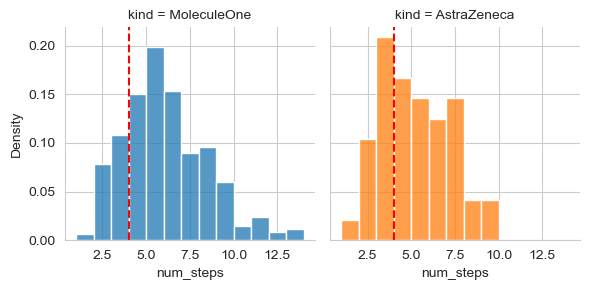

In [6]:
bins = np.arange(tmp.num_steps.min(), tmp.num_steps.max() + 1, 1)

g = sns.FacetGrid(tmp, col="kind", hue='kind')
g.map(sns.histplot, "num_steps", bins=bins, stat='density')

# Define a function to add vertical lines
def add_vertical_line(x=4, *args, **kwargs):
    plt.axvline(x=4, color='r', linestyle='--')

# Apply the function to each subplot
g.map(add_vertical_line)

plt.show()

In [7]:
df.num_steps_az.notna().sum() / 10, \
len(df.query("num_steps_az.notna() & num_steps_az <= 3")) / 10 

(4.8, 1.6)

In [8]:
df.num_steps_one.notna().sum() / 10, \
len(df.query("num_steps_one.notna() & num_steps_one <= 3")) / 10 

(33.3, 6.4)

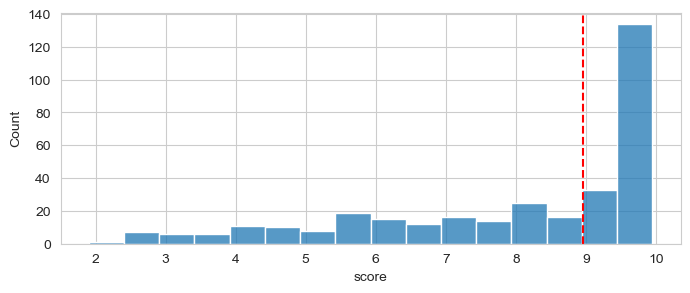

In [9]:
plt.figure(figsize=(8, 3))
sns.histplot(molone_df.query('num_steps.notna()').score, bins=16);

plt.axvline(x=8.95, color='r', linestyle='--')

# plt.title("MoleculeOne Score")
plt.show();

In [10]:
df.query('num_steps_one.notna()').score_one.median()

8.949383359744857

# Success for both

In [11]:
df.query("num_steps_az.notna() & num_steps_one.notna()").id_az.tolist()

[1049,
 1050,
 1053,
 1054,
 1055,
 1056,
 1057,
 1060,
 1065,
 1070,
 1071,
 1072,
 1073,
 1076,
 1080,
 1087,
 1091,
 1092,
 1093,
 1101,
 1105,
 1107,
 1108,
 1116,
 1122,
 1133,
 1135,
 1156,
 1170,
 1187,
 1201,
 1213,
 1222,
 1239,
 1363]

In [12]:
df.query("num_steps_az.notna() & num_steps_one.notna()")

,smi,num_steps_one,score_one,num_steps_az,score_az,id_az,id_one
2,CCN(C)C(C)(C)C1=NN(CC(C)C)N=C1,2.0,2.797724,3.0,0.986553,1049,2
3,CCCC(O)C1=CC=NC=C1C1N=COC1C,2.0,2.727592,2.0,0.994040,1050,3
6,CCN(C1=NC(CO)=CC=C1Cl)C(C)(C)C,2.0,2.908670,1.0,0.997629,1053,6
7,CN1CC(C1)C1=CC=C(Cl)C2=C1C=CO2,3.0,2.854476,4.0,0.975000,1054,7
8,CCC(C)N(CC1=CN=CO1)CC1=CNC=C1,2.0,1.901889,2.0,0.994040,1055,8
9,CC(OC1=CC=CN=C1C1=NC(C)=NO1)C#N,2.0,2.708160,2.0,0.994040,1056,9
10,CC1=C(C)N(N=C1)C1=CC2=C(CCCN2)N1,2.0,3.066946,9.0,0.950899,1057,10
13,CCCOC1CCC(CC1C)NCC(C)C#N,2.0,3.011318,6.0,0.955960,1060,13
18,CCN1C=NC2=C1N=C1CCCCC1=C2C,1.0,3.215203,4.0,0.975000,1065,18
23,CCCOC1=CN=C(N=C1)N(C)C1=CNC=C1,6.0,4.258974,2.0,0.994040,1070,23


In [13]:
import datamol as dm
from rdkit import Chem

mols = df.query("num_steps_az.notna() & num_steps_one.notna()").smi.apply(Chem.MolFromSmiles)

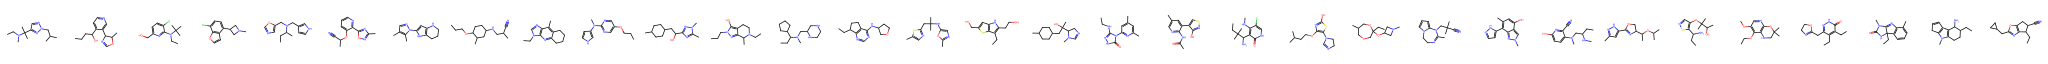

In [19]:
dm.viz.to_image(mols.values, mol_size=(180, 180), n_cols=87)

In [15]:
import mols2grid

In [16]:
mols2grid.display(df.query("num_steps_az.notna() & num_steps_one.notna()"), smiles_col='smi')

MolGridWidget()

In [17]:
mols2grid.display(df.query("num_steps_one.notna()").sort_values(by='score_one'), smiles_col='smi')

MolGridWidget()